In [1]:
import cv2
import torch
# from moge.model.v1 import MoGeModel
from moge.model.v2 import MoGeModel # Let's try MoGe-2
import matplotlib.pyplot as plt

device = torch.device("cuda:0")

In [2]:

# Load the model from huggingface hub (or load from local).
model = MoGeModel.from_pretrained("../models/MoGe/moge-2-vitl-normal.pt").to(device)                       

# Read the input image and convert to tensor (3, H, W) with RGB values normalized to [0, 1]
input_image = cv2.cvtColor(cv2.imread("../data/sample_images/groceries.jpg"), cv2.COLOR_BGR2RGB)                       
input_image = torch.tensor(input_image / 255, dtype=torch.float32, device=device).permute(2, 0, 1)    

In [ ]:

# Infer
output = model.infer(input_image)
"""
`output` has keys "points", "depth", "mask", "normal" (optional) and "intrinsics",
The maps are in the same size as the input image. 
{
    "points": (H, W, 3),    # point map in OpenCV camera coordinate system (x right, y down, z forward). For MoGe-2, the point map is in metric scale.
    "depth": (H, W),        # depth map
    "normal": (H, W, 3)     # normal map in OpenCV camera coordinate system. (available for MoGe-2-normal)
    "mask": (H, W),         # a binary mask for valid pixels. 
    "intrinsics": (3, 3),   # normalized camera intrinsics
}
"""

'\n`output` has keys "points", "depth", "mask", "normal" (optional) and "intrinsics",\nThe maps are in the same size as the input image. \n{\n    "points": (H, W, 3),    # point map in OpenCV camera coordinate system (x right, y down, z forward). For MoGe-2, the point map is in metric scale.\n    "depth": (H, W),        # depth map\n    "normal": (H, W, 3)     # normal map in OpenCV camera coordinate system. (available for MoGe-2-normal)\n    "mask": (H, W),         # a binary mask for valid pixels. \n    "intrinsics": (3, 3),   # normalized camera intrinsics\n}\n'

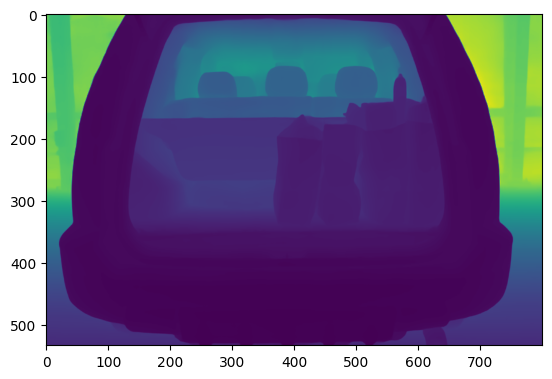

In [9]:
plt.imshow(output["depth"].cpu())